In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
pd.set_option('display.max_columns', None) 
#pd.reset_option('display.max_columns')

In [4]:
df_2013 = pd.read_excel("fy_2013_incidents_public_release_1-4-2018_tls_1.xlsx", header=1)
#df_2013.head()

In [5]:
yearly_df = pd.read_csv("Yearly Incidents.csv")
yearly_df.head()


,Stats,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fatalities,4,1,1,2,1,1,6,6,2,1
1,Injuries,310,280,290,174,191,171,222,160,164,199
2,Lifting,165,177,138,110,123,111,169,274,259,333
3,Fires,109,121,92,82,86,77,84,87,117,126
4,Explosions,1,4,2,0,3,3,4,1,4,1


In [6]:
# Filter the DataFrame to get only the rows where "Stats" is "Fatalities"
fatalities_df = yearly_df[yearly_df["Stats"] == "Fatalities"]

fatalities_df[['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022']].sum(axis=1)

0    25
dtype: int64

In [7]:
fatalities_df.head()

,Stats,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fatalities,4,1,1,2,1,1,6,6,2,1


In [8]:
df = pd.read_csv("TRY4Full2013_2022Data.csv")
df.head()

,date,time,company name,district (2010),panel,ocs region,district name,area name,block,lease,water depth (feet),distance to shore (miles),structure name,structure type,rig name,rig type,pipeline segment number,incident summary,number fatalities,number injury > 3 days lost time,number injury > 3 days restricted work/job transfer,number injury 1-3 days lost time,number injury 1-3 days restricted work/job transfer,number of injury no lost time,explosion,fire,loss of well control (underground),loss of well control (surface),loss of well control (diverter),loss of well control (equipment failure/improper procedure),major collision (property damage > $25k),minor collision (property damage < S25k),crane,other lifting device,other lifting device name,reportable h2s release,shut down gas release,required muster,exploration,development production,drilling,workover,completion,motor vessel,pipeline,helicopter,other,other operation description,equipment failure,human error,slip trip fall,weather,external damage,leak,upset h2o,overboard fluid,other cause,other cause description,year
0,41183,1300.0,Shell Offshore Inc.,N,NaN,Gulf of Mexico,Houma,WALKER RIDGE 60,95,G31943,NaN,NaN,NaN,NaN,NOBLE GLOBETROTTER,Drillship,NaN,While using a hammer to remove a tong die from...,NaN,NaN,NaN,NaN,NaN,1.0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN,2013
1,41184,2000.0,Stone Energy Corporation,N,NaN,Gulf of Mexico,New Orleans,MAIN PASS AREA 17,288,G01665,420,35,A,Fixed Leg Platform,NaN,NaN,NaN,An individual was installing a man way cover b...,NaN,NaN,NaN,1.0,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,Y,Vessel Cleaning,N,N,N,N,N,N,N,N,N,NaN,2013
2,41184,1645.0,ATP Oil & Gas Corporation,N,NaN,Gulf of Mexico,New Orleans,MISSISSIPPI CANYON 60,711,G14016,3005,49,A (GOMEZ),Semi Submersible (Column Stabilized Unit) Floa...,NaN,NaN,NaN,An employee was cleaning the inside of the wel...,NaN,NaN,NaN,NaN,NaN,1.0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN,2013
3,41185,430.0,"Venoco, Inc.",N,NaN,Pacific,California,Los Angeles,6912,P00205,739,11,GAIL,Fixed Leg Platform,NaN,NaN,NaN,The GDE-701 gas detector head spiked to 20% LE...,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,Y,N,Y,N,N,N,N,N,N,N,NaN,Y,N,N,N,N,N,N,N,N,NaN,2013
4,41185,815.0,Shell Offshore Inc.,N,NaN,Gulf of Mexico,Houma,WALKER RIDGE 60,508,G17001,NaN,NaN,NaN,NaN,NOBLE DANNY ADKINS,DP Semisubmersible,NaN,The crew was in the process of changing out th...,NaN,NaN,NaN,NaN,NaN,1.0,N,N,N,N,N,N,N,N,N,Y,Chain Hoist,N,N,N,N,Y,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN,2013


In [9]:
# why fatalities from whole data do not match the high-level fatalities from the website?

df["number fatalities"].value_counts()

number fatalities
0.0    2925
1.0      26
2.0       2
3.0       1
Name: count, dtype: int64

In [10]:
df_fatalities = df.dropna(subset=['number fatalities'])

In [11]:
fatalities_df.head()

,Stats,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fatalities,4,1,1,2,1,1,6,6,2,1


In [12]:
df_fatalities = df_fatalities[df_fatalities["number fatalities"] != 0]
df_fatalities.groupby("year")["number fatalities"].sum()
# different years = 2014, 2021, 2022
# 1+6+1 = 8


year
2013    4.0
2014    2.0
2015    1.0
2016    2.0
2017    1.0
2018    1.0
2019    6.0
2020    6.0
2021    8.0
2022    2.0
Name: number fatalities, dtype: float64

In [13]:
df_fatalities.groupby("year")["number fatalities"].sum()

year
2013    4.0
2014    2.0
2015    1.0
2016    2.0
2017    1.0
2018    1.0
2019    6.0
2020    6.0
2021    8.0
2022    2.0
Name: number fatalities, dtype: float64

/var/folders/fq/n8rn1dtx6k34rv37c81hq01w0000gn/T/ipykernel_91197/3036682111.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_name_counts.index, y=district_name_counts.values, palette='viridis')


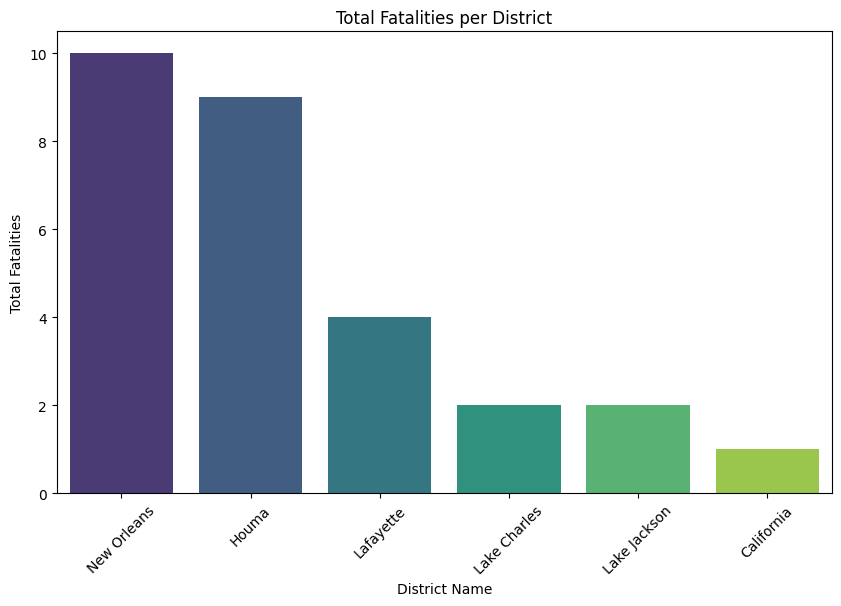

In [14]:
# Fatalities Chart, total fatalities is 33!

# Calculate the frequency of unique values in the "district name" column
district_name_counts = df_fatalities['district name'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=district_name_counts.index, y=district_name_counts.values, palette='viridis')

# Customize the plot
plt.xlabel('District Name')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities per District')
plt.xticks(rotation=45)
plt.show()


In [15]:
df.groupby("year")["number fatalities"].count()

year
2013      2
2014      2
2015      1
2016      2
2017      1
2018      1
2019    614
2020    687
2021    773
2022    871
Name: number fatalities, dtype: int64

In [16]:
df.shape

(6144, 59)

In [17]:
# Clean the 'district name' column
# df["district name"] = df["district name"].astype(str).str.replace(" District", "")
# df.to_csv("TRY4Full2013_2022Data.csv")

In [18]:
df["district name"].value_counts()

district name
New Orleans     2212
Houma           1968
Lafayette        754
Lake Jackson     448
Lake Charles     340
California       270
Camarillo         82
Santa Maria        4
Anchorage          3
Name: count, dtype: int64

In [19]:
df.columns

Index(['date', 'time', 'company name', 'district (2010)', 'panel',
       'ocs region', 'district name', 'area name', 'block', 'lease',
       'water depth (feet)', 'distance to shore (miles)', 'structure name',
       'structure type', 'rig name', 'rig type', 'pipeline segment number',
       'incident summary', 'number fatalities',
       'number injury > 3 days lost time',
       'number injury > 3 days restricted work/job transfer',
       'number injury 1-3 days lost time',
       'number injury 1-3 days restricted work/job transfer',
       'number of injury no lost time', 'explosion', 'fire',
       'loss of well control (underground)', 'loss of well control (surface)',
       'loss of well control (diverter)',
       'loss of well control (equipment failure/improper procedure)',
       'major collision (property damage > $25k)',
       'minor collision (property damage < S25k)', 'crane',
       'other lifting device', 'other lifting device name',
       'reportable h2s release'

In [20]:

# # Calculate the frequency of unique values in the "district name" column
# district_name_counts = df['district name'].value_counts()

# # Create a bar plot using seaborn
# plt.figure(figsize=(10, 6))
# sns.barplot(x=district_name_counts.index, y=district_name_counts.values, palette='viridis')

# # Customize the plot
# plt.xlabel('District Name')
# plt.ylabel('Frequency')
# plt.title('Frequency of Unique District Names')
# plt.xticks(rotation=45)
# plt.show()


In [21]:
df["number fatalities"].value_counts()

number fatalities
0.0    2925
1.0      26
2.0       2
3.0       1
Name: count, dtype: int64

In [22]:
26 + (2*2) + (3*1)

33

In [23]:
# Equipment failure proportion = 5.2 %
equipment_injury_proportion = np.mean(df["equipment failure"] == "Y")
print(equipment_injury_proportion)

# Human error proportion = 9.1 %
human_error_proportion = np.mean(df["human error"] == "Y")
print(human_error_proportion)

# Other proportion = 1.7%
other_error_proportion = np.mean(df["other cause"] == "Y")
print(other_error_proportion)

# slip and trip fall = 1%
slip_error_proportion = np.mean(df["slip trip fall"] == "Y")
print(slip_error_proportion)


0.052083333333333336
0.09114583333333333
0.01708984375
0.010091145833333334


In [24]:
# Equipment failure proportion = 0 %
equipment_injury_proportion = np.mean(df_fatalities["equipment failure"] == "Y")
print(equipment_injury_proportion)

# Human error proportion = 3.4 %
human_error_proportion = np.mean(df_fatalities["human error"] == "Y")
print(human_error_proportion)

# Other proportion = 0%
other_error_proportion = np.mean(df_fatalities["other cause"] == "Y")
print(other_error_proportion)

# slip and trip fall = 0%
slip_error_proportion = np.mean(df_fatalities["slip trip fall"] == "Y")
print(slip_error_proportion)

0.0
0.034482758620689655
0.0
0.0


In [25]:
# Using Chat GPT 
# My Prompt: df["Incident Summary"] - use nlp libraries of python to get the 10 most frequent words

from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Combine all incident summaries into a single string
all_summaries = " ".join(df["incident summary"].astype(str).tolist())

# Tokenize the text
words = word_tokenize(all_summaries)

# Convert words to lower case and remove punctuation and stop words
words = [word.lower() for word in words if word.isalnum()]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the 25 most common wordss
most_common_words = word_counts.most_common(75)

print(most_common_words)


[('ip', 5541), ('crane', 4866), ('fire', 3124), ('incident', 3028), ('deck', 2962), ('personnel', 2307), ('operator', 2305), ('platform', 2019), ('damage', 1878), ('gas', 1834), ('work', 1820), ('crew', 1610), ('load', 1601), ('time', 1544), ('area', 1484), ('line', 1474), ('approximately', 1459), ('back', 1411), ('pipe', 1402), ('evaluation', 1366), ('employee', 1362), ('rig', 1356), ('boat', 1345), ('2', 1299), ('facility', 1288), ('investigation', 1286), ('occurred', 1254), ('equipment', 1202), ('basket', 1202), ('sent', 1159), ('alarm', 1158), ('injuries', 1127), ('injured', 1123), ('causing', 1119), ('operations', 1117), ('well', 1114), ('vessel', 1099), ('one', 1073), ('boom', 1073), ('attached', 1073), ('1', 1036), ('lift', 1019), ('report', 992), ('hand', 975), ('water', 966), ('muster', 950), ('side', 913), ('valve', 899), ('made', 881), ('smoke', 875), ('due', 874), ('shut', 863), ('reported', 853), ('immediately', 850), ('drill', 849), ('compressor', 845), ('caused', 841), (

In [26]:
# Get all rows that contain the word 'ip' in the 'incident summary' column
rows_with_particular_words = df[df["incident summary"].str.contains("crane", case=False, na=False)]

# Adjust pandas display settings to show full content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(rows_with_particular_words["incident summary"].head())

10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   The incident involved rigging (wire sling and shackle) used during handling a boat bumper with a crane along side the Drill Ship. The IP (roustabout) was injured during the process.
12                                                                                                                                                                                                                                                           

In [27]:
# Top 50 words in Fatalities dataframe.
# filtered df_fatalities ==> 'fatalities' = non NANs and non 0.

from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Combine all incident summaries into a single string
all_summaries = " ".join(df_fatalities["incident summary"].astype(str).tolist())

# Tokenize the text
words = word_tokenize(all_summaries)

# Convert words to lower case and remove punctuation and stop words
words = [word.lower() for word in words if word.isalnum()]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the 25 most common wordss
most_common_words = word_counts.most_common(75)

print(most_common_words)


[('hrs', 18), ('occurred', 14), ('incident', 14), ('medic', 13), ('fatality', 12), ('ip', 12), ('deceased', 12), ('platform', 11), ('operations', 11), ('pipe', 11), ('notified', 11), ('time', 10), ('plates', 10), ('medivac', 10), ('vessel', 9), ('investigation', 9), ('approximately', 8), ('performing', 8), ('employee', 8), ('seadrill', 8), ('team', 8), ('bsee', 8), ('rig', 7), ('helicopter', 7), ('two', 7), ('kosmos', 7), ('inspection', 7), ('strap', 7), ('cpr', 7), ('gulf', 6), ('mexico', 6), ('contractor', 6), ('one', 6), ('uscg', 6), ('ratchet', 6), ('drilling', 5), ('feet', 5), ('cleaning', 5), ('personnel', 5), ('report', 5), ('leader', 5), ('stanchion', 5), ('oim', 5), ('around', 4), ('energy', 4), ('offshore', 4), ('llc', 4), ('service', 4), ('departed', 4), ('crew', 4), ('tank', 4), ('skid', 4), ('2', 4), ('fell', 4), ('welder', 4), ('body', 4), ('pressure', 4), ('received', 4), ('hospital', 4), ('released', 4), ('area', 4), ('deck', 4), ('occupational', 4), ('well', 4), ('info

In [28]:
df_2014 = pd.read_excel("fy2014_public_release_5-10-2017.xlsx", header=1)
df_2014.head()

,Date,Time,Company,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number Fatalities,Number Injury > 3 Days Lost Time,Number Injury > 3 Days Restricted Work/Job Transfer,Number Injury 1-3 Days Lost Time,Number Injury 1-3 Days Restricted Work/Job Transfer,Number of Injury No Lost Time,Fire/Explosion Category,Explosion,Fire,Loss of Well Control (Underground),Loss of Well Control (Surface),Loss of Well Control (Diverter),Loss of Well Control (Equipment failure/improper procedure),Major Collision (Property damage > $25K),Minor Collision (Property damage ≤ $25k),Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,2013-10-09 00:00:00,730.0,"Energy XXI GOM, LLC",N,NaN,Gulf of Mexico,New Orleans,MAIN PASS AREA 17,107,G31435,61,17,D,Fixed Leg Platform,NaN,NaN,NaN,A helicopter departed for crew change with 4 passengers. The helicopter went down into the water approximately 1 minute after departing the structure._x000D_\nOne fatality resulted from helicopter crash and 3 injured._x000D_\n_x000D_\n\n_x000D_\n,1.0,3.0,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,Y,Helicopter crash,N,N,N,N,N,N,N,N,N,NaN
1,2014-05-17 00:00:00,830.0,Walter Oil & Gas Corporation,Y,N,Gulf of Mexico,Houma,SOUTH TIMBALIER AREA 17,285,G32224,375,55,NaN,NaN,ROWAN GORILLA IV,Jackup,NaN,"On May 17, 2014, while in the process of performing abandonment operations on Walter Oil and Gas's (Walter) #001 well, three employees onboard the Rowan Gorilla IV were burned by a flash fire when welding operations ignited gas that had migrated into the wellbore. The rig crew had just finished cutting and pulling the 22 inch casing from the well and was preparing to move on to the 36 inch casing. A 'Hot Work Permit', along with a Job Safety Analysis (JSA), was filled out by the crew members before operations began. Although the documents were filled out as required, both failed to identify all of the hazards associated with the operation. Furthermore, Walter's approved welding plan calls for strict supervision of welding operations that take place outside of the 'Safe Welding Area'. More oversight on the part of the Supervisors may have helped prevent the accident. In order to complete the task, the crew was going to need to weld pad eyes to the inside of the casing in order to latch onto the load and pull it from the well. The preferred way to accomplish this task would have been to weld the pad eyes to the outside of the casing. Because of the casing's large diameter (36 inches), the pad eyes needed to be welded to the inside walls to allow enough room for the casing to pass through the rotary on the drill floor. The JSA completed prior to the start of the job failed to identify any hazards associated with performing welding operations in a hazardous area or the risk of gas being ignited from inside the well. During the investigation, a Permit to Work was provided to the inspectors upon request but the form was incomplete. There are specific sections on the form that are provided to allow for the gas readings to be recorded and the certification dates of the equipment to be documented, but all were blank. In addition, several of the precautions stated in Walter's approved ""Welding, Burning, and Hot-Tapping Plan"" were ignored or overlooked, increasing the chances of an accident. The crew cut the 36 inch casing and began getting ready to remove it. As the pad eyes were being welded to the inside of the pipe, burning slag was allowed to fall inside of the wellbore. The gas

In [29]:
df_2015 = pd.read_excel("fy_2015_incidents_public_release_4-5-2017_tls.xlsx", header=1)
df_2015.head()

Date    Time                           Company   \
0  2014-10-01 00:00:00  1700.0               Fieldwood Energy LLC   
1  2014-10-03 00:00:00   914.0  LLOG Exploration Offshore, L.L.C.   
2  2014-10-04 00:00:00  1930.0               Fieldwood Energy LLC   
3  2014-10-05 00:00:00  1700.0               Fieldwood Energy LLC   
4  2014-10-06 00:00:00  1632.0               Apache Deepwater LLC   

  District (2010) Panel      OCS Region District Name              Area Name  \
0               Y     N  Gulf of Mexico     Lafayette  Eugene Island Area 17   
1               N   NaN  Gulf of Mexico   New Orleans  Mississippi Canyon 60   
2               N   NaN  Gulf of Mexico         Houma     Ship Shoal Area 17   
3               N   NaN  Gulf of Mexico   New Orleans     South Pass Area 17   
4               N   NaN  Gulf of Mexico   New Orleans  Mississippi Canyon 60   

  Block   Lease  Water Depth (feet)  Distance to Shore (miles) Structure Name  \
0   355  G19797               288.0                       80.0              A   
1   547  G32334              3280.0                       39.0     A- WHO DAT   
2   204  G01520               108.0                       43.0          A-PRD   
3    87  G07799               390.0                       13.0              D   
4   674  G13687              2710.0                       69.0            NaN   

       Structure Type    Rig Name           Rig Type   \
0      Well Protector         NaN                 NaN   
1     Semisubmersible         NaN                 NaN   
2  Fixed Leg Platform         NaN                 NaN   
3  Fixed Leg Platform         NaN                 NaN   
4                 NaN  ENSCO 8505  DP Semisubmersible   

   Pipeline Segment Number  \
0                      NaN   
1                      NaN   
2                      NaN   
3                      NaN   
4                      NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [30]:
df_2016 = pd.read_excel("fy_2016_incidents_public_release_4-5-2017_tls.xlsx", header=1)
df_2016.head()

,Date,Time,Company Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number Fatalities,Number Injury > 3 Days Lost Time,Number Injury > 3 Days Restricted Work/Job Transfer,Number Injury 1-3 Days Lost Time,Number Injury 1-3 Days Restricted Work/Job Transfer,Number of Injury No lost Time,Fire Explosion Category,Explosion,Fire,Loss of Well Control (Underground),Loss of Well Control (Surface),Loss of Well Control (Diverter),Loss of Well Control (Equipment failure/improper procedure),Major Collision (Property damage >$25k),Minor Collision (Property damage ≤ $25k),Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2o,Overboard Fluid,Other Cause,Other Cause Description
0,2015-10-01 00:00:00,336.0,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,New Orleans,Mississippi Canyon 60,383,G07937,4727.0,NaN,NaN,NaN,ENSCO DS-3,Drillship,NaN,"Lines in mud pits were in process of being cleaned - drill water was being transferred from active pit #3 through the mixing line to the slug pit #1 and into waste pit #6. The dump valve on the slug pit was open and waste pit #6 had stagnant fluid. Once drill water from slug pit #1 started to fill up waste pit #6, the gas vapors went up through the dump valve on slug pit #1 and reached the Active Mud Pit Room sensors. Fixed alarm detector was triggered with an H2S reading of 11 ppm._x000D_\n_x000D_\nAt 03:36 hours the H2S automated alarm system sounded. At 03:39 all personnel were instructed to muster on heli-deck. Well was confirmed secured (current operations were TIH with BSR #1 closed). At 03:52 full muster was accomplished. Investigation team inspected mud pit room using portable gas detectors - reading 0 ppm. Fixed detector reading was 0 ppm. At 04:13 hours all clear given and personnel released from muster. Slug pit #1 dump valve closed; waste pit #6 isolated from slug pit #1. No harm to personnel or environment.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,NaN,N,N,Y,Y,N,N,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,2015-10-01 00:00:00,1230.0,"Cobalt International Energy, L.P.",N,NaN,Gulf of Mexico,Lafayette,Garden Banks 60,958,G30876,4846.0,NaN,NaN,NaN,ROWAN RELIANCE,Drillship,NaN,"While the aux hydra-racker was traveling to retrieve another stand of drill pipe from the finger board, the lower trolley traveled faster than the upper trolley causing the hydra-racker to misalign. Personnel stopped the operation and switched the hydra-racker in manual mode to attempt to restore the hydra-racker to vertical. The pre-programmed deviation alarm shutdown was then activated, reading 0.5 meters misalignment on the cyber-chair screen; actual measurement was ~15' of misalignment. Initial inspections found damage to the upper drive trolley._x000D_\n _x000D_\nRoot Cause Analysis: By extracting the raw data from each the lower and upper encoder, it was found that the PLC was receiving erratic data from the lower trolley encoder, which resulted in the PLC (Programmable Logic Controller) sending erroneous signals to the lower drive trolley. This malfunction caused the lower drive trolley to drive ahead of the upper drive trolley. The NOV representative repaired the upper drive trolley and replaced the faulty encoder. NOV then declared the unit fit for service._x000D_",NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,Y,Hydraracker,N,N,N,Y,N,N,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,2015-10-01 00:00:00,1240.0,"Black Elk Energy Offshore Operations, LLC",Y,N,Gulf of Mexico,Lake Jackson,High Island Are 42,A 442,G11383,172.0,80.0,A,Fixed Leg Platform,NaN,NaN,NaN,"On October 1, 2

In [31]:
df_2017_1 = pd.read_excel("fy2017_public_release_2-22-2018.xlsx", header=1)
df_2017_1.head()
df_2017_1.shape

(366, 60)

In [32]:
df_2017_2 = pd.read_excel("fy2017_public_release_2-22-2018.xlsx", header=1)
df_2017_2.head()
df_2017_2.shape

(366, 60)

In [33]:
df_2018 = pd.read_excel("cy2018-public-release-01-17-2020.xlsx", header=1)
df_2018.head()


,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number of Fatalities,Number Injuries >3 Days Lost Time,Number Injuries > 3 Days Restricted Work/Job Transfer,Number Injuries 1-3 Days Lost Time,Number Injuries 1-3 Days Restricted Work/Job Transfer,Number of Injuries No lost Time,Explosion,Fire,Loss of Well Control (Underground),Loss of Well Control (Surface),Loss of Well Control (Diverter),Loss of Well Control (Equipment failure/improper procedure),Major Collision (Property damage >$25k),Minor Collision (Property damage ≤ $25k),Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2o,Overboard Fluid,Other Cause,Other Cause Description
0,2018-01-02 00:00:00,1620.0,Talos Petroleum LLC,N,NaN,Gulf of Mexico,Houma District,SHIP SHOAL AREA,114,00064,57.0,14.0,A-PRD,FIXED,NaN,NaN,NaN,"There was a fire on the gas compressor that developed between the exhaust system and insulation blanket. The investigation is underway to determine the root cause. This eWell will be updated after the investigation is complete.\n\n**Update - January 18, 2018**\nOur office was closed due to the weather conditions on January 17, 2017 so we were not able to submit an eWell update on the follow-up due date. The investigation is still ongoing so there is nothing to report at this time. \n\n**Update - February 9, 2018**\nThe findings of the investigation are as follows:\n\nIMMEDIATE CAUSES: \n * A problematic Kenco Oil Regulator / Level Safety Low (LSL) malfunctioned, exacerbated by increased oil viscosity due to excessively cold temperatures. In response to the low level alarm, operations manually added oil to the running engine to clear the alarm, exceeding the OEM maximum recommended level. Residual oil migrated thru the engine, breached the exhaust system and ignited.\n\nSYSTEMIC CAUSES:\n * Communication\n ** Lack of recognizing and reporting chronic issues to maintenance organization.\n * Training / Knowledge transfer\n ** Knowledge transfer not effective\n *** Hazard Identification - Overfill\n *** Crankcase Oil Level Checking\n\nACTIONS-\n * Issue a memorandum to communicate the ""Consequences of Overfilling Oil Levels and proper way of checking crankcase oil levels."" 1Q2018- Maintenance Superintendent\n * Review with operations during annual safety meeting 2Q2018- Maintenance Superintendent\n\nAREA OF IMPROVEMENT-\n * Verify current operations / maintenance are in line with OEM / Industry accepted practice. 1Q2018 - Maintenance Superintendent\n * Mount Kenco Oil Regulator/ Sensor directly to the engine. This will ensure a directly level measurement and increased temperature. 1Q2018- Production Operations\n\n**UPDATED April 17, 2018**\nIn response to the BSEE's comments about changing the incident root cause:\nWe initially thought the root cause of the incident was due to the missing o-ring and higher than normal oil viscosity due to unusually low temperature. The investigation team took a deeper dive by contacting the engine manufacture and further investigation determined that the missing o-ring and high oil viscosity was only a contributing factor to the incident and in fact the root cause was determined to be overfilling the engine sump with oil. The reason why this changed the root cause was because if the engine had not been overfilled, the oil would not have carried over through the crank case breather and into the engine's air intake system resulting in a fire.\n\n * A Safety Bulletin and Maintenance Memorandum was sent to field personnel notifying everyone of the investigation fi

In [34]:
df_2019 = pd.read_excel("cy-2019-excel-spreadsheet.xlsx", header=1)
df_2019.head()

,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Number of Fatalities,Number Injuries >3 Days LT,Number Injuries >3 Days RW,Number Injuries 1-3 Days LT,Number Injuries 1-3 Days RW,Number of Other Injuries,Explosion,Fire,LOST_WELL_CNTRL_UNDERGROUND_FL,LOST_WELL_CNTRL_SURFACE_FLAG,LOST_WELL_CNTRL_DIVERTER_FLAG,LOST_WELL_CNTRL_EQMT_FAIL_FL,MAJOR_REPORTABLE_COLLISION_FL,MINOR_REPORTABLE_COLLISION_FL,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Required Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip Fall,Weather,External Damage,Leak,Upset H2o,Overboard Fluid,Other Cause,Other Cause Description
0,2019-01-07,2300,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,New Orleans District,Mississippi Canyon,822,G14658,NaN,NaN,NaN,NaN,HELIX Q5000,Dp Semisubmersible,NaN,"While installing handrails on top of the Expro 500-bbl tank, a crew member was descending from the top of the tank. Handrail gave way causing IP to fall ~10'-12'. IP was tied off and wearing a safety harness, which partially arrested his fall. IP was assessed by the medic.\n \nStop work was conducted and a safety meeting was held covering the working at heights policy and to re-focus the crews. The Captain released the rig back to work. Work on the 500 bbl tanks has been halted for investigation. \n\nThe IP was sent to shore for further evaluation.",0,0,0,1,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,2019-01-08,750,"Arena Offshore, LP",N,NaN,Gulf of Mexico,Houma District,South Timbalier Area,52,G01241,61.0,13.0,B-QTR,FIXED,NaN,NaN,NaN,"While using a swing rope to transfer from the M/V to the facility, the IP lost his grip and fell into water. Man overboard was announced and the crew from the M/V aided the IP onto the back deck of the vessel.",0,1,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,2019-01-08,37,Eni US Operating Co. Inc.,N,NaN,Gulf of Mexico,New Orleans District,Ewing Bank,921,G12142,1700.0,71.0,A-Morpeth East,MTLP,VALARIS 8505 (ENSCO 8505),Dp Semisubmersible,NaN,"The crane was lowering the hose to the vessel to refuel and in doing so the crane operator further lowered the hose, allowing it to enter the water. In spite of being fitter with floats, the hose sank and was sucked into the starboard z-drive of the vessel, shutting down the drive. \n \nThe decision was made to cut the hose, secured it aboard the vessel and returned to port for removal. The vessel safely made the transit to port where the hose was successfully removed from the starboard z-drive. Following a check of the vessel's DP systems and the z-drive, the vessel returned offshore.\n\nThere were no personal injuries, environmental damage or damage to the vessel or the rig. The hose had to be cut to facilitate removal from the z-drive and is unusable.",0,0,0,0,0,0,N,N,N,N,N,N,N,N,Y,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
3,2019-01-09,220,Talos ERT LLC,Y,N,Gulf of Mexico,Houma District,Green Canyon,282,G16727,2349.0,96.0,NaN,NaN,NOBLE DON TAYLOR,Drillship,NaN,"On January 9, 2019, an incident occurred on board the drillship, Noble Don Taylor\nwhile under contract for Talos Energy Resource Technology (ERT) LLC. The Noble Don\nTaylor was located at Green Canyon Block 282 OCS - G -16727 at the time of the\nincident. A single 35,000 pound slick riser joint fell across the rig floor after it\nwas hoisted into the air using a hydraulic riser running tool which was suspended from\nthe top drive. There were no injuries reported, but an employee in the area was\nnearly struck by the dropped riser joint.",0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,Y,hy

In [35]:
df_2020 = pd.read_excel("cy-2020-offshore-incident-statistics-excel-spreadsheet.xlsx", header=1)
df_2020.head()

,SN_EV_MASTERS,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Redacted Incident Summary,Operator Fatalities,Contractor Fatalities,Operator Number Injuries >3 Days LT,Contractor Number Injuries >3 Days LT,Operator Number Injuries 1-3 Days LT,Contractor Number Injuries 1-3 Days LT,Operator Number Injuries >3 Days RW,Contractor Number Injuries >3 Days RW,Operator Number Injuries 1-3 Days RW,Contractor Number Injuries 1-3 Days RW,Contractor Number of Other Injuries,Operator Number of Other Injuries,Explosion,Fire,Loss of Well Control Underground,Loss of Well Control Surface,Loss of Well Control Diverter,Loss of Well Control Equipment Failure,Major Collision,Minor Collision,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Muster,Exploration,Development Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip and Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,-25897,2020-01-03,1315,Anadarko Petroleum Corporation,N,N,Gulf of Mexico,Lake Jackson District,East Breaks,643,G09184,3650.0,113.0,A-Boomvang Spar,Spar Platform - Floating Production System,NaN,NaN,NaN,"The PSLL for glycol pump tripped. Immediately after that a loud continuous noise could be heard throughout the platform. It was determined that there was a gas leak from the suction hose of the glycol recycle pump hose.\n\nImmediate Actions: Platform ESD activated. All personnel mustered. Shutdown emergency generator and turbines. Stand by vessels informed of situation and instructed to move to safe location. Production crews blew down facility and isolated equipment responsible, and leak stopped/secured.\n\nCorrective actions taken: Replaced damaged hose. Investigative actions initiated. Initiated inspection of hoses of similar type and construction on facility.\nReplacement hoses ordered with stamping for date of manufacture and applicable pressure ratings. Recommended development and implementation of inspection/ replacement program for all similar hoses in production system, subsequent to investigative outcome and related recommendations.\n\nUntil further notice, flexible hoses in the Gas Dehydration System being purchased or replaced with existing spares must be coordinated through the Tech Services Group. Also, if work is being done on equipment with flexible hose(s) in the above service, it is highly recommended that a new replacement be purchased prior to work being conducted.",0,0,0,0,0,0,0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,Y,Y,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,-25878,2020-01-04,930,Exxon Mobil Corporation,N,N,Gulf of Mexico,Lake Jackson District,Alaminos Canyon,25,G10380,4825.0,137.0,A-Hoover Spar,Spar Platform - Floating Production System,NaN,NaN,NaN,An employee was utilizing a needle gun to clean up handrails which may have contributed to the IP's injury. The IP was sent in for further evaluation. The IP was released to return to work without restrictions .,0,0,0,0,0,0,0,0,0,0,1,0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,-25909,2020-01-04,1325,Talos ERT LLC,N,N,Gulf of Mexico,Houma District,Green Canyon,237,G15563,2200.0,130.0,B(Helix),Mobile Production Unit,NaN,NaN,NaN,"A surge protector that was used to power several of the monitors in the Control Room shorted out. Personnel smelled a burn odor but did not see smoke or fire. The short caused a temporary drop in UPS voltage, which caused the loss of power to the DTS Control Panel and the Control Room 120v. The loss of power to the control room servers caused a complete shut in of the field. There was no muster of personnel or loss of dynamic positioning.\n\nInitial Actions:\n* Operators smelt burning smell and i

In [36]:
df_2021 = pd.read_excel("cy-2021-excel-spreadsheet.xlsx", header=1)
df_2021.head()

,SN_EV_MASTERS,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Operator Fatalities,Contractor Fatalities,Operator Number Injuries >3 Days LT,Contractor Number Injuries >3 Days LT,Operator Number Injuries 1-3 Days LT,Contractor Number Injuries 1-3 Days LT,Operator Number Injuries >3 Days RW,Contractor Number Injuries >3 Days RW,Operator Number Injuries 1-3 Days RW,Contractor Number Injuries 1-3 Days RW,Contractor Number of Other Injuries,Operator Number of Other Injuries,Explosion,Fire,Loss of Well Control Underground,Loss of Well Control Surface,Loss of Well Control Diverter,Loss of Well Control Equipment Failure,Major Collision,Minor Collision,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip and Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,-30080,2021-01-01,857,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,Houma District,Green Canyon,743,NaN,NaN,NaN,NaN,NaN,ISLAND PERFORMER,Well Intervention Vessel,NaN,A member of the catering/steward staff discovered smoke coming from a dryer in the laundry room on the main deck. The individual immediately went upstairs to notify his supervisor (Chief Steward). The Chief Steward and the steward went back to the laundry room to discover small flames in the dryer drum. The Chief Steward called the Captain immediately and notified him of the fire. The Captain sounded the alarm at 0857 while using the PA to dispatch the fire team and to notify personnel to muster. All personnel not involved with the emergency team mustered and were accounted for.,0,0,0,0,0,0,0,0,0,0,0,0,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,Vessel installing subsea kit,N,N,N,N,N,N,N,N,N,NaN
1,-30089,2021-01-02,855,Woodside Energy (GOM) Inc.,N,NaN,Gulf of Mexico,Houma District,Green Canyon,609,G16764,4293.0,116.0,NaN,NaN,T.O. DEEPWATER INVICTUS,Drillship,NaN,The cook smelled an unusual smell and saw a small flame coming from a crack in the Steam Table. The cook doused it with water and notified the Campboss. The Campboss noticed a small amount of black smoke coming out of a crack of the steam table on his arrival and immediately unplugged it. The cabinet doors were opened where no flame was seen. The Chief Mate was notified via the bridge and he assessed the situation. The electricians arrived and removed the electrical panel access cover and found the terminal block has smoldered. No system alarms were activated and no other fire fighting measures were used.,0,0,0,0,0,0,0,0,0,0,0,0,N,Y,N,N,N,N,N,N,N,N,NaN,N,N,N,Y,N,N,Y,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,-30112,2021-01-02,1300,Talos Petroleum LLC,N,NaN,Gulf of Mexico,Houma District,Ship Shoal Area,112,00066,45.0,14.0,V,FIXED,NaN,NaN,NaN,"Operators observed a minor leak on the V-5 bonnet where the ring gasket connects to the SSV. The operator attempted to tighten the flange; however, the leak did not stop so the operation shut in the well. On 01.03.2021, the gasket was replaced and the well was brought back online.",0,0,0,0,0,0,0,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,NaN,N,Y,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
3,-30081,2021-01-03,1515,BP Exploration & Production Inc.,N,NaN,Gulf of Mexico,Houma District,Green Canyon,787,NaN,7050.0,124.0,A (Atlantis),SEMI,NaN,NaN,NaN,"During weekly run of Emergency Generator, the PLC was reset which resulted in the emergency buss losing power, effecting the emergency powered lights, air handlers, and the Firewater Pump B. Main power was uninterrupted and there was no impact on the production monitoring or safety systems or main firewater supply. Fire

In [37]:
df_2022 = pd.read_excel("cy-2022-excel-spreadsheet.xlsx", header=1)
df_2022.head()

,SN_EV_MASTERS,Date,Time,Operator Name,District (2010),Panel,OCS Region,District Name,Area Name,Block,Lease,Water Depth (feet),Distance to Shore (miles),Structure Name,Structure Type,Rig Name,Rig Type,Pipeline Segment Number,Incident Summary,Operator Fatalities,Contractor Fatalities,Operator Number Injuries >3 Days LT,Contractor Number Injuries >3 Days LT,Operator Number Injuries 1-3 Days LT,Contractor Number Injuries 1-3 Days LT,Operator Number Injuries >3 Days RW,Contractor Number Injuries >3 Days RW,Operator Number Injuries 1-3 Days RW,Contractor Number Injuries 1-3 Days RW,Contractor Number of Other Injuries,Operator Number of Other Injuries,Explosion,Fire,Loss of Well Control Underground,Loss of Well Control Surface,Loss of Well Control Diverter,Loss of Well Control Equipment Failure,Major Collision,Minor Collision,Crane,Other Lifting Device,Other Lifting Device Name,Reportable H2S Release,Shut Down Gas Release,Muster,Exploration,Development Production,Production,Drilling,Workover,Completion,Motor Vessel,Pipeline,Helicopter,Other Operation,Other Operation Description,Equipment Failure,Human Error,Slip Trip and Fall,Weather,External Damage,Leak,Upset H2O,Overboard Fluid,Other Cause,Other Cause Description
0,-32975.0,2022-01-01,1200.0,Exxon Mobil Corporation,N,NaN,Pacific,California District,South Marsh Island Area,6636,P00188,842.0,5.0,HONDO,FIXED,NaN,NaN,NaN,ExxonMobil employee was sent in on 1/1/2022 and confirmed positive\n\n,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N,N,N,N,N,N,NaN,N,N,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
1,-32906.0,2022-01-02,2200.0,Shell Offshore Inc.,N,NaN,Gulf of Mexico,New Orleans District,Mississippi Canyon,809,G05868,3970.0,62.0,A-Ursa TLP,TLP,NaN,NaN,NaN,"While performing an intelatrac round, EE discovered a small amount of process gas leaking from the DOT VPSV. EE immediately contacted the CRO and OIM, and a controlled platform shutdown was initiated. Further evaluation of the VPSV by ACRs and engineering determined that it had a compromised seal. A repair was performed, and replacement parts put on order. Platform start-up was authorized after engineering evaluations completed and field mitigations were put in place. The total amount of gas leaked during this event was calculated at approximately 0-10kg. No work was being performed on the DOT VPSV, the leak was detected during a regular round of the platform. The facility was at full production rate. No pollution was associated with the leak; no fluids/liquids entered the Gulf of Mexico. There was no muster performed. There was no hot work being performed at the time the leak was detected. The estimated cost to repair the leaking seal was $300.00. Corrective Action: Compromised seal was replaced, further investigation is currently underway to determine failure cause._x000D_\nUpdated January 20, 2022: Concerning the investigation of the DOT VPSV seal failure; the VPSV was replaced during a Pit Stop or TAR with an under rated VPSV. The ordered VPSV went off of the original spec and the team wasn't aware of a previous MOC. The VPSV is scheduled to be replaced in the 2022 TAR. Until the 2022 TAR, rebuild kits are onboard if it should leak again._x000D_\nJanuary 27, 2022 Update: A pit stop is a short amount of time for a shut-in to execute work, whereas a TAR (turnaround) is a longer period of time.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N,N,N,N,N,N,NaN,N,Y,N,N,Y,Y,N,N,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,NaN
2,-32987.0,2022-01-03,15.0,"Renaissance Offshore, LLC",N,NaN,Gulf of Mexico,Houma District,Ship Shoal Area,219,G36942,112.0,38.0,A-CMP,FIXED,NaN,NaN,NaN,"Contractor Company: Renaissance Offshore, LLC\nOn January 3, 2022 at approximately 0015 hours, as the Operator was making rounds, a visible flame from the lube oil separator on the compressor unit was witnessed. The unit was manually shut down immediately and the flame was extinguished using a 30# ABC dry chemical fire extinguisher. A collective investig

In [38]:
df_2021.columns

Index(['SN_EV_MASTERS', 'Date', 'Time', 'Operator Name', 'District (2010)',
       'Panel', 'OCS Region', 'District Name', 'Area Name', 'Block', 'Lease',
       'Water Depth (feet)', 'Distance to Shore (miles)', 'Structure Name',
       'Structure Type', 'Rig Name', 'Rig Type', 'Pipeline Segment Number',
       'Incident Summary', 'Operator Fatalities', 'Contractor Fatalities',
       'Operator Number Injuries >3 Days LT ',
       'Contractor Number Injuries >3 Days LT ',
       'Operator Number Injuries 1-3 Days LT',
       'Contractor Number Injuries 1-3 Days LT',
       'Operator Number Injuries >3 Days RW',
       'Contractor Number Injuries >3 Days RW',
       'Operator Number Injuries 1-3 Days RW',
       'Contractor Number Injuries 1-3 Days RW',
       'Contractor Number of Other Injuries',
       'Operator Number of Other Injuries', 'Explosion', 'Fire',
       'Loss of Well Control Underground', 'Loss of Well Control Surface',
       'Loss of Well Control Diverter',
       'Los